# Procesamiento de Lenguaje Natural - **Pre-procesamiento & Análisis Léxico**

Esta notebook presenta ejemplos de los diferentes aspectos relacionados con el pre-procesamiento y análisis léxico vistos en clase.


En caso de que los ejemplos lo requieran, los ejecutaremos tomando como base el comienzo de "Harry Potter y la Piedra Filosofal".

In [ ]:
text = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. \
        Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere."

text_list = ["Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.",
                    "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
                    "Mr. Dursley was the director of a firm called Grunnings, which made drills."
                    "He was a big, beefy man with hardly any neck, although he did have a very large mustache."
                    "Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.",
                    "The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere."]

text_short = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much"

## Pre-procesamiento

Es el proceso que consiste en limpiar y estandarizar el texto de forma que pueda ser consumido por otros sistemas. La idea es remover "todo aquello que sobre" y obtener el texto "limpio".

Vamos a ver cómo:

* Eliminar tags html.
* Case conversion.
* Eliminar caracteres especiales.
* Eliminar términos innecesarios.
* Segmentación y tokenización de texto
* Expandir contracciones.
* Corregir spelling.
* Normalización de inflecciones.

### Eliminar tags html

* El texto no estructurado puede tener mucho ruido, especialmente si el texto fue scrappeado de la Web.

* Típicamente, los tags HTML, JavaScript y IFrame no agregan valor al análisis del texto.

* El objetivo es extraer contenido textual significativo a partir de los datos extraídos de la Web.

¿Qué vamos a hacer?

Vamos a traernos el contenido de la página de Wikipedia dedicada a ```Harry Potter```. 

In [ ]:
import requests
data = requests.get('https://en.wikipedia.org/wiki/Harry_Potter') 
content = data.content # obtenemos el contenido de la página
print(content)

En este caso vamos a aprovechar ``BeautifulSoup`` que ya permite eliminar los tags, pero también podríamos haberlo realizado utilizando expresiones regulares, como veremos más adelante. 


Notar que respeta los saltos de línea y no elimina el código javascript que aparece en la página.

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(content,"html.parser")
textw = soup.get_text()
print(textw)

**Ojo!** En este caso se elimina todo lo que esté relacionado al html recuperado, pero puede que por necesidades de nuestra aplicación esto no sea suficiente y tengamos que realizar un procesamiento más "inteligente" del html debiendo acceder a sus elementos por clase y navegando el árbol.

### Case conversion

En la mayoría de los casos el matching entre términos suele ser léxico, por ejemplo, "Casa" y "casa" serían detectados como palabras diferentes. Esto tiene como consecuencia, por un lado, la creación innecesaria de un vocabulario/diccionario (el conjunto total de palabras) más amplio, y por otro la imposibilidad de encontrar otras estructuras similares. Es por esto que es impotante que las palabras (o tokens como vamos a ver más adelante) estén escritas de la misma forma. 

Para ello se suele convertir todas las palabras a algún case particular.
* lower case
* Upper case
* Title Case

In [ ]:
# lowercase
text_ = 'The quick brown fox jumped over The Big Dog'
text_.lower()

In [ ]:
# uppercase
text_.upper()

In [ ]:
# title case
text_.title()

### Eliminar caracteres especiales

De forma similar a cuando eliminanos los tags de html, también podemos eliminar otros símbolos que y caracteres que agregan ruido a los textos. Dos elementos que suelen eliminarse con frecuencia son los dígitos y los caracteres no alfanuméricos.

**Ojo!** Qué eliminar depende de la tarea a realizar!! 

#### Expresiones Regulares

Una expresión regular (o regex) es un String que define un patrón de búsqueda.

Cuatro tareas principales:
* **Encontrar** una cadena en un texto más largo.
* **Validar** que un String se adecua a un formato específico.
* **Reemplazar** o **insertar** texto.
* **Dividir** Strings.

Además de poder encontrar secuencias definidas ad-hoc, existen algunas expresiones que permiten encontrar determinados conjuntos de caracteres. También existe un conjunto de caracteres especiales que no pueden ser utilizados de forma directa en las regex, debiendo ser escapeados. 

Python nos provee diversas funciones para reconocer y operar expresiones regulares:

* ``match``. Intenta hacer matching entre la regex y el String desde el comienzo del String. Retorna un objeto match si lo encuentra, None si falla.

* ``findall``. Retorna una lista de todas las instancias de la regex en el String, ordenados de izquierda a derecha.

* ``search``. Similar a match(), pero busca en todo el String.

* ``split``. Divide el String de acuerdo a las ocurrencias de la regex.

* ``sub``. Reemplaza las coincidencias de la expresión regular por la expresión dada.


In [ ]:
import re

In [ ]:
re.findall('cool','NLP is cool')

In [ ]:
re.findall('cool','NLP is the coolest'),re.findall('cool','She bought a watercooler'),re.findall('cool','NLP is supercool')

In [ ]:
re.findall('a','The program is great'),re.findall('a','THE PROGRAM IS GREAT')

In [ ]:
re.findall('3','Uso Python 3.7')

In [ ]:
re.findall('\s','NLP is cool')

In [ ]:
re.findall('\d','Tengo 2 perros y 1 gato')

In [ ]:
re.findall('\d','El precio del libro es 412.10')

In [ ]:
re.findall('\D','El precio del libro es 412.10')

In [ ]:
re.findall('\w','a@B$1.^5! _')

In [ ]:
re.findall('\W','a@B$1.^5! _')

In [ ]:
re.findall('[aeiou]','manzana')

In [ ]:
re.findall('[0123456789]','El precio del libro es 412.10'),re.findall('[0-9]','El precio del libro es 412.10')

In [ ]:
re.findall('hello','hello!'),re.findall('^hello','hello!'),re.findall('hello$','hello!')

In [ ]:
re.findall('hello','She said hello'),re.findall('^hello','She said hello'),re.findall('hello$','She said hello')

In [ ]:
re.findall('Mr. Stark','Mr. Stark')

In [ ]:
re.findall('Mr. Stark','MrX Stark'),re.findall('Mr. Stark','Mr5 Stark')

In [ ]:
re.findall('Mr\. Stark','Mr. Stark'),re.findall('Mr\. Stark','MrX Stark'),re.findall('Mr\. Stark','Mr5 Stark')

In [ ]:
re.findall('\d\d',"We are in 2021."),re.findall('\d{2}',"We are in 2021.")

In [ ]:
re.findall('sounds?','It soundss cool'),re.findall('sounds+','It soundss cool'),re.findall('sounds*','It soundss cool')

In [ ]:
re.findall('sounds?','It sound cool'),re.findall('sounds+','It sound cool'),re.findall('sounds*','It sound cool')

In [ ]:
re.findall('([\w\.]+)@((?:[\w]+\.)+)([a-zA-Z]{2,4})','probando.lala@hotmail.com')

In [ ]:
re.findall('(([\w\.]+)@((?:[\w]+\.)+)([a-zA-Z]{2,4}))','probando.lala@hotmail.com')

Veamos las opciones de matching en Python.

In [ ]:
regex = '[A-Z]\w+' # una mayúscula seguida de 1 o más letras, dígitos o _

to_match = "hello World from DUIA"

# match
print('match: ',re.match(regex,to_match))

# findall
print('findall: ',re.findall(regex,to_match))

# search
print('search: ',re.search(regex,to_match))

# split
print('split: ',re.split(regex,to_match))

# replace
print('replace: ',re.sub(regex,'REP',to_match))

Usando expresiones regulares, vamos a eliminar todo aquello que no sean letras y, opcionalmente, números.

In [ ]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

textSC = "Well this was fun! What do you think? 123#@!"

print(remove_special_characters(textSC,remove_digits=True))

print(remove_special_characters(textSC,remove_digits=False))

Volviendo a la eliminación de tags html, ahora lo vamos a realizar utilizando expresiones regulares. 

Basándonos en la extracción que hace ``BeautifulSoup`` que ya usamos previamente le agregamos un poquito más de comportamiento para eliminar los scripts de código y los documentos embebidos. Luego, eliminamos los múltiples saltos de línea consecutivos.

In [ ]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])] # eliminamos los elementos de tipo iframe y script, si quisieramos recuperarlos y no solo borrarlos, deberíamos utilizar decompose
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text) # reemplazamos secuencias de saltos de línea por uno solo
    return stripped_text

In [ ]:
clean_content = strip_html_tags(content)
print(clean_content)

#### Normalización Unicode

Dijimos que hay dos tipos de normalizaciones, canónica y de compatibilidad.

**Equivalencia canónica**

|  Equivalencia || Razón |
| --- | --- | --- |
| Ç   |  C◌̧ | Secuencias de chars combinados |
| 가   | ᄀ ᅡ | Caracteres koreanos múltiples |

Ambas formas son la misma. Cuando se las renderiza son lo indistinguibles.

In [ ]:
print("\u00C7", "\u0043"+"\u0327")

Si los imprimimos por separado, veremos que no son lo mismo.

In [ ]:
print("\u00C7", "\u0043", "\u0327")

**Equivalencia de compatibilidad**

|  Equivalencia || Razón |
| --- | --- | --- |
| ℌ | H | Fuentes distintas |
| \[NBSP\] | \[SPACE\] | Secuencias de salto de línea |
| ① | 1 | Variante con círculo |
| x² | x2 | Superíndice |
| xⱼ | xj | Subíndice |
| ½ | 1/2 | Fracciones |

Se refiere principalmente a diferencias de formato. Hay una diferencia cuando se renderizan los chars: `ℌ` and `H`, or `½` and `1 ⁄ 2`.

Si queremos comparar si estas formas que vemos "parecidas" o "iguales" son efectivamente iguales, veremos que no:

In [ ]:
"Ç" == "Ç"

In [ ]:
"ℌ" == "H"

Hay cuatro formas de normalización:

| Nombre | Abreviación | Descripción | Example |
| --- | --- | --- | --- |
| Form D | NFD | Descomposición *canónica*  | `Ç` → `C ̧` |
| Form C | NFC | Descomposición *canónica* + composición *canónica* | `Ç` → `C ̧` → `Ç` |
| Form KD | NFKD | Descomposición de *compatibilidad* | `ℌ ̧` → `H ̧` |
| Form KC | NFKC | Descomposición de *compatibilidad* + composición *canónica* | `ℌ ̧` → `H ̧` → `Ḩ` |

Vamos a ver cada forma con un ejemplo.

Tenemos una c cedilla que puede ser representada de dos formas:

* Como único char llamado *C mayúscula latina con cedilla* (``\u00C7``).
* Como dos chars llamados *C mayúscula latina* (``\u0043``) + *cedilla combinada* (``\u0327``).

In [ ]:
c_with_cedilla = "\u00C7"  # Latin capital C with cedilla (single character)
c_with_cedilla

In [ ]:
c_plus_cedilla = "\u0043\u0327"  # \u0043 = Latin capital C, \u0327 = 'combining cedilla' (two characters)
c_plus_cedilla

In [ ]:
c_with_cedilla == c_plus_cedilla

Si aplicamos **NFD** sobre la C con cedilla (``\u00C7``), *descomponemos* el char en sus componentes, que en este caso son la *C mayúscula latina* (``\u0043``) y *cedilla combinada* (``\u0327``). 

Esto significa que si comparamos el char normalizado con **NFD** con la C cedilla que resulta de la combinación de dos chars, retornará ``true``.

In [ ]:
import unicodedata

In [ ]:
unicodedata.normalize('NFD', c_with_cedilla) == c_plus_cedilla

Sin embargo, si aplicamos **NFC** sobre la C con cedilla (``\u00C7``), *descomponemos* el char en sus componentes, que en este caso son la *C mayúscula latina* (``\u0043``) y *cedilla combinada* (``\u0327``), para luego *componerlos* nuevamente a ``\u00C7``, lo que significa que no va a matchear.

In [ ]:
unicodedata.normalize('NFC', c_with_cedilla) == c_plus_cedilla

Si por el contrario, usamos **NFC** sobre la C cedilla combinada, primero serán *descompuestos* (lo cual no tendrá ningún efecto dado que ya se encuentra descompuesto), y luego *compuesto* en la versión `\u00C7` de un único char.

In [ ]:
c_with_cedilla == unicodedata.normalize('NFC', c_plus_cedilla)

La normación **NFK** no descompone los chars en sus sub-componentes, sino, que en sus versiones más "normales".

Por ejemplo, si tenenos la h "fancy" *ℌ* `\u210B`, no podemos de componerla en múltiples chars, con lo que ni *NFD* ni *NFC* tendrán ningún efecto. Sin embargo, si aplicamos **NFKD**, veremos que se transforma en una *H* "sencilla" (`\u0048`).

In [ ]:
unicodedata.normalize('NFKD', 'ℌ')

Qué pasa si se nos ocurre combinar ℌ (`\u210B`) con la cedilla (`\u0328`)?

In [ ]:
"\u210B\u0327"

Si aplicamos **NFKD** nos va a dar la H mayúscula y una cedilla.

In [ ]:
unicodedata.normalize('NFKD', "\u210B\u0327").encode('utf-8')

Pero, si aplicamos **NFKC**, primero se aplica la descomposición de compatibilidad, a dos chars separados, antes de componerlos canónicamente.

In [ ]:
unicodedata.normalize('NFKC', "\u210B\u0327").encode('utf-8')

Debido a que la diferencia entre estos dos métodos es una composición canónica, no se observan diferencias cuando los chars son mostrados.

In [ ]:
unicodedata.normalize('NFKC', "\u210B\u0327"), unicodedata.normalize('NFKD', "\u210B\u0327"), 

#### Normalización - Acentos

Un caso especial de la eliminación de caracteres especiales, es la eliminación de acentos. Si los acentos no aportan información, lo mejor es eliminarlos. Por ejemplo, en el caso en el que estemos trabajando con idioma inglés, que no los incluyen.

El segundo parámetro del encode y decode determina la estrategia de manejo de errores:
* ```strict```. Por defecto. Lanza excepción si no es posible la conversión.
* ```ignore```. Ignoramos los errores y se intenta dejar el texto lo más legible posible.
* ```replace```. Se reemplazan los caracteres que generaron los errores por "?".


In [ ]:
title = u"Klüft skräms inför på fédéral électoral große"
print (title.encode('ascii','ignore')) # de esta forma se pierden muchos caracteres
print (title.encode('ascii','replace'))

In [ ]:
print (title.encode('utf-8','ignore'))

In [ ]:
print (unicodedata.normalize('NFKD', title).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

In [ ]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = text.encode("utf-8",'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

### Segmentación - Tokenización

Un párrafo de texto, o un documento tienen diversos componentes, incluyendo oraciones, las cuales pueden ser divididas en frases y palabras.

En este sentido, la tokenización es el proceso de separar el texto en partes más pequeñas y significativas, denominadas "tokens". Los tokens son independientes y son los componentes mínimos que tienen una sintaxis (y una semántica) determinada.

Las formas más comunes de tokenización incluyen la tokenización de oraciones (texto --> oraciones) y palabras (oraciones --> palabras).

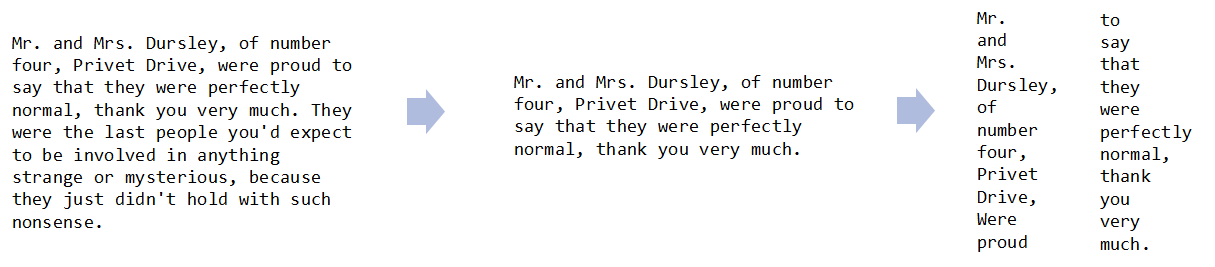

#### Tokenización de oraciones

En este caso, vamos a dividir un párrafo o texto en oraciones que conformaran los tokens de primer nivel del texto.


##### NLTK

Provee diversas alternativas. Vamos a concentrarnos en dos:
* ``Sent_tokenize``. Incluye al resto de las alternativas.
* ``RegExp``. Se basa en la definición de una expresión regular. Puede generar complicaciones dependiendo del idioma que se este queriendo tokenizar.

In [ ]:
import nltk

import numpy as np
nltk.download('punkt') # necesitamos descargar el tokenizer que va a ser usado internamente

In [ ]:
default_st = nltk.sent_tokenize

hp_sentences = default_st(text=text)
print('Total sentences in sample_text:', len(hp_sentences))
print('Sample text sentences :-')
print(np.array(hp_sentences))

Ahora definiendo una expresión regular...

La expresión a utilizar trata de encontrar secuencias de letras (tanto mayúsculas como minúsculas) que esten seguidas por puntos. Utilizar este tokenizer implica utilizar un enfoque más ad-hoc. Tiene sentido si, por algún motivo, se quiere modificar la definición "standard" de lo que el lenguaje considera una oración. 

Nótese también que la expresión regular a utilizar depende del idioma que se quiere tokenizar, dado que no todos los idiomas tienen las mismas reglas que el inglés. Por ejemplo, el chino o el árabe.

In [ ]:
SENTENCE_TOKENS_PATTERN = r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\.|\?|\!)\s' 
# (?<!  ) hace referencia a un negative lookbehind, es decir que lo que sigue a ?<! no esté antecedido por la expresión o grupo que sigue ej. (?<!a)b matchea bed y no cab 
# (?<= ) hace referencia a un positive lookbehing, es decir, que lo que sugue a ?<! esté antecedido por la expresión o grupo que sigue ej. (?<!a)b matchea cab y no bed

regex_st = nltk.tokenize.RegexpTokenizer(pattern=SENTENCE_TOKENS_PATTERN,gaps=True)

hp_sentences = regex_st.tokenize(text)

print('Total sentences in sample_text:', len(hp_sentences))
print('Sample text sentences :-')
print(np.array(hp_sentences))


##### spaCy

Es una biblioteca muy completa, pero no es la mejor desde un punto de vista de consistencia entre versiones. Los cambios de funcionalidad vienen acompañados de cambios a la interfaz de la API, por ejemplo, en cómo se llaman los modelos, como se crean los elementos, cuales son las partes constitutivas de los elementos, ...

Hay que leer bien la documentación y tener cuidado al actualizar!!

In [ ]:
pip install spacy

In [ ]:
import spacy
import numpy as np

In [ ]:
# recuerden que puede ser necesario tener que descargar el modelo previamente.
# spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm') # se pueden cargar distintos modelos define qué es lo que va incluido en el pipeline de pre-procesamiento. En este caso, carga: pipeline": ["tagger", "parser", "ner"]

hp_doc = nlp(text)
hp_sentences = list(hp_doc.sents)

print('Total sentences in sample_text:', len(hp_sentences))
print('Sample text sentences :')
print(np.array(hp_sentences))

##### Stanford CoreNLP

Otra opción más... Al igual que el de ```NLTK```, este word tokenizer también está basado en el Tree Bank Corpus. Al igual que ```spaCy```, también define un pipeline completo de pre-procesamientos y demás que se aplicarán al texto.

In [ ]:
pip install stanza

In [ ]:
import stanza
stanza.download('en') # hay que descargar los modelos para el lenguaje que querramos analizar

In [ ]:
nlp = stanza.Pipeline('en') # se setea el pipeline por defecto para el idioma inglés. Por defecto: tokenize, pos tagger, lemmatization, ner y parsing sintáctico

stanford_hp_doc = nlp(text) # doc contiene todas las anotaciones

for _,sentence in enumerate(stanford_hp_doc.sentences): 
    sent = ' '.join(word.text for word in sentence.words) # acceder al contenido de las oraciones no es trivial, hay que acceder a las palabras y concatenarlas
    print(sent) # si imprimiésemos directamente sent, obtendríamos las palabras con cada uno de las etiquetas que le puso el pipeline

#### Tokenización de palabras

Así como el sentence tokenizer quería dividir un texto en oraciones, el word tokenizer tiene que como objetivo dividir una oración en palabras.

La tokenización de palabras es importante en muchos procesos, especialmente en la limpieza y normalización de textos donde las operaciones como la derivación y la lematización se aplican a cada palabra individual en función de sus respectivos stems y lemas.


##### NLTK

Provee varias alternativas:

* ``word_tokenizer`` (usa el TreeBankWordTokenizer de fondo)
* ``TreeBankWordTokenizer``. Utiliza expresiones regulares y asume que ya se realizó el tokenizado de oraciones. Sigue algunas reglas:
  * Separa los puntos al final de las operaciones.
  * Separa las comas y comillas simples seguidas por espacios.
  * Se separa la mayoría de los signos de puntuación.
  * Separa palabras y sus contracciones.

* ``TokTokTokenizer``. Asume que se le da una oración por línea, con lo que solo el punto final es tokenizado. Si se necesita borrar algo más, se pueden agregar expresiones regulares. Funciona bien para diversos idiomas (English, Persian, Russian, Czech, French, German, Vietnamese)

* ``Regexp``. 

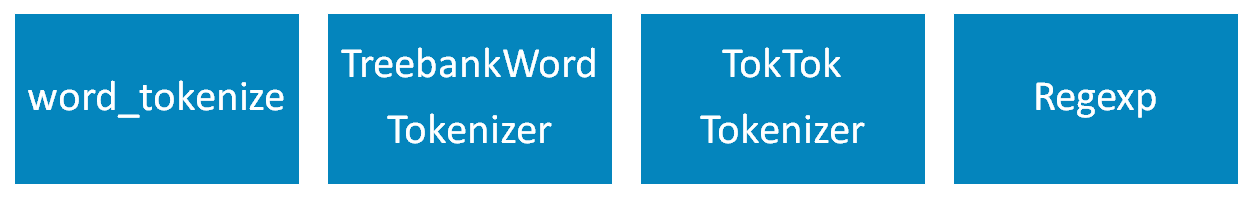

In [ ]:
default_wt = nltk.word_tokenize # word_tokenizer por default
words = default_wt(text) # le damos el texto completo
np.array(words)

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer

words_toktok = ToktokTokenizer().tokenize(text)
np.array(words_toktok)

In [ ]:
TOKEN_PATTERN = r'\w+'

regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN,gaps=False) # con False encuentra los tokens y con True los separadores de los tokens
words_reg = regex_wt.tokenize(text)
np.array(words_reg)

##### spaCy

Recordemos que ya tenemos definido y ejecutado el pipeline  ```nlp``` de ```spaCy```, con lo que en este caso solo tenemos que acceder a los elementos.


* El texto es dividido considerando los caracteres blancos.
* Por cada substring, de izquierda a derecha, se hacen dos controles:

  1. Coincide el String con una regla de excepción? Por ejemplo:
    * “don’t” no contiene un blanco, pero debe ser separado en “do” y “n’t”.
    * “U.K.” no debe separarse.

  2. Puede extraerse un prefijo, sufijo o infijo? 
     * Por ejemplo, signos de puntuación (comas, puntos, comillas, hyphens).

* Si hay una coincidencia se aplica la regla y se comienza con los Strings separados.

Esto le permite a spaCy dividir estructuras complejas como estructuras anidadas o combinaciones multiples signos de puntuación.


In [ ]:
tokens = [ token.text for token in hp_doc ]
print(tokens)

##### Stanford CoreNLP

Como en ```spaCy```, ya tenemos ejecutado el pipeline con lo que en este caso solo tenemos que acceder a los elementos.

In [ ]:
for _, sentence in enumerate(stanford_hp_doc.sentences): 
    words = [word.text for word in sentence.words]
    print(words)

#### Expansión de contracciones

Las contracciones son versiones acortadas de las palabras o sílabas, en las cuales se eliminaron letras o sonidos específicos. Por lo general son omitidas en la escritura formal, pero abundan en la informal como las redes sociales.

Existen varias formas de contracciones y están vinculadas al tipo de verbos auxiliares, negaciones, ….

Representan un problema porque:
* Hacen que se incluyan tokens adicionales en el diccionario.
* Pueden generar problemas cuando se está intentando realizar una tokenización.
* Generan excepciones al tokenizar y estandarizar.


Idealmente, se debe contar con el mapeo entre las contracciones y su correspondiente expansión. Se puede hacer directamente con expresiones regulares, pero resulta lento para textos de gran tamaño.







##### Expresiones regulares

La forma más básica de realizar la expansión es utilizando un mapa de contracciones que mapee la contracción a su forma expandida. Luego, el diccionario es utilizado como parte de una expresión regular para matchear y reemplazar.

In [ ]:
CONTRACTION_MAP = { # nuestro mapa de contracciones
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is", # notar que he's también podría ser he has, pero se opta por el uso más común
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would", # esta también podría haber sido I had
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def expand_contractions(sentence, contraction_mapping): # definimos una función que haga los reemplazos que corresponda
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), # las {} en la primera parte indican lo que hay que reemplzar por el parámetro
                                      flags=re.IGNORECASE|re.DOTALL) # dotall fuerza a que el punto matchee con cualquier caracter incluyendo el salto de línea
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                   if contraction_mapping.get(match)\
                                     else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
        
    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence

In [ ]:
text_to_expand = "Oh no he didn't. I can't and I won't. I'll know what I'm gonna do."

print(expand_contractions(text_to_expand,CONTRACTION_MAP))

##### spaCy

En este caso, es posible agregar excepciones al tokenizer, como se muestra en el siguiente fragmento de código. Sin embargo, si se observa la salida, las contracciones más comunes ya se encuentran incluidas en el tokenizer. La diferencia con el caso anterior es que la expansión no se hace sobre la parte conjugada sino sobre el lemma. Es por eso que al ejecutar vemos que "I'm" pasa a "I be" en lugar de a "I am".

**Nota.** Acá también se pude observar un caso de incompatibilidad respecto a versiones más viejas de ``spaCy``. Mientras que en versiones viejas en las excepciones se podían especificar todos los tags (como ``LEMMA`` y ``TAG``), en las versiones más nuevas solo se permite ``ORTH`` y ``NORM``.

In [ ]:
import spacy
from spacy.symbols import ORTH, LEMMA, NORM, TAG

nlp = spacy.load('en_core_web_sm')  

# nlp.tokenizer.add_special_case( 'I\'m', [{ORTH: 'I', LEMMA: 'I'},{ORTH: '\'m', LEMMA: 'be', NORM: 'am', TAG: 'VERB'}])
nlp.tokenizer.add_special_case( 'I\'m', [{ORTH: 'I'},{ORTH: '\'m', NORM: 'am'}])

doc1 = nlp(text_to_expand)
for _, sentence in enumerate(doc1.sents): 
    print(sentence)

for t in doc1:
    print(t.text, t.lemma_)

#### Paquetes especiales para las contracciones

Existen algunos paquetes que pueden ser utilizados que o bien traer el mapa de contracciones incorporado, o aplican modelos para definir las expansiones.

##### Contractions

Resuelve contracciones utilizando un diccionario, al que le agrega vocabulario del "slang". Por ejemplo:
```
ima    -> I am going to
yall  -> you all
gotta  -> got to
```

En el caso de ambigüedades, expande considerando el caso más común.

In [ ]:
pip install contractions

In [ ]:
import contractions

print(contractions.fix("you're happy now"))

print(contractions.fix("yall're happy now", slang=False)) # default: true

print(contractions.fix("yall're happy now")) # sin el indicador de slang, yall no la reconoce

In [ ]:
contractions.add('mychange', 'my change') # también es posible agregar contracciones propias

##### [PyContractions](https://pypi.org/project/pycontractions/)

A diferencia de la utilización de mapas, esta propone la expansión contextual, es decir, utilizar el contexto para determinar cuál es la expansión adecuada. Por ejemplo, dado que

```
I'd -> I would
I'd -> I had
```
Cuáles serían las expansiones correctas en la siguiente oración?
```
I’d like to know how I’d done that!
```

Para la expansión, utiliza un enfoque de tres pasos:

1. Contracciones simples que solo matchean con una única regla son expandidas.
2. Para aquellas contracciones que matchean con más de una regla:

    a. Se reemplaza la contracción por todas las posibles reglas.

    b. Cada nuevo texto es pasado por un corrector gramatical y se calcula una distancia entre los nuevos textos y el original.
3. Se ordenan las hipótesis considerando la cantidad de errores (menor a manyor) y la distancia entre el texto original y las hipótesis (menor a mayor distancia). Se selecciona la primera del ranking.

La distancia es medida considerando "Word Mover’s Distance (WMD)", la cual mide la distancia entre dos documentos como la mínima distancia que los embeddings de cada uno de ellos debe moverse para alcanzar los embeddings del otro documento. Debido a que la diferencia entre cada una de las hipótesis de reemplzado, la hipótesis más cercana a la del texto original será aquella con la menor distancia entre los embeddings correspondientes a la contracción y la hipótesis. 

Aunque el modelo entrenado con Google News tiene buenos resultados, puede cometer errores. Por ejemplo: ``We ain't all the same`` es expandido a ``We have not all the same``. Esto sucede debido a las frecuencias de aparición de las diferentes secuencias en Google.


Antes de poder instalar ``pycontractions`` debemos instalar sus dependencias, incluyendo Java 8. Sin Java 8 no es posible instalar correctamente ``language-check``. En teoría, ``language-check`` debería ser capaz de instalar solito Java, en caso de que eso no suceda, hay que hacerlo de forma manual. También requiere que descarguemos un modelo de embeddings (puede tardar la descarga).

In [ ]:
!sudo apt install openjdk-8-jdk
!sudo update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

In [ ]:
!pip install language-check

In [ ]:
!pip install pycontractions

In [ ]:
import functools
import pathlib
import shutil
import requests
from tqdm.auto import tqdm as tqdmauto
import requests
import os

def download_file(url, filename):    
    r = requests.get(url, stream=True, allow_redirects=True)
    if r.status_code != 200:
        r.raise_for_status()  # Will only raise for 4xx codes, so...
        raise RuntimeError(f"Request to {url} returned status code {r.status_code}")
    file_size = int(r.headers.get('Content-Length', 0))

    path = pathlib.Path(filename).expanduser().resolve()
    path.parent.mkdir(parents=True, exist_ok=True)

    desc = "(Unknown total file size)" if file_size == 0 else ""
    r.raw.read = functools.partial(r.raw.read, decode_content=True)  # Decompress if needed
    with tqdmauto.wrapattr(r.raw, "read", total=file_size, desc=desc) as r_raw:
        with path.open("wb") as f:
            shutil.copyfileobj(r_raw, f)

    return path

In [ ]:
import gzip
import shutil

datapath = "GoogleNews-vectors-negative300.bin"

if not os.path.exists(datapath):
    print("File does not exist")
  
    if not os.path.exists(datapath+".gz"):
        print("Downloading file...") 
        url = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
        os.makedirs("data", exist_ok=True)
        download_file(url, datapath+".gz")
  
    print("Extracting data...")

    with gzip.open(datapath+".gz","rb") as f_in:
        with open(datapath,"wb") as f_o:
            shutil.copyfileobj(f_in,f_o)

In [ ]:
from pycontractions import Contractions

cont = Contractions('GoogleNews-vectors-negative300.bin') # cargamos el modelo

Puede tardar... presenta dos opciones una opción "rápida" y menos precisa, o la opción precisa. 

Como se puede ver en el ejemplo, una de las diferencias es la expansión del ``'d``.

In [ ]:
list(cont.expand_texts(["I'd like to know how I'd done that!",
                            "We're going to the zoo and I don't think I'll be home for dinner.",
                            "Theyre going to the zoo and she'll be home for dinner."]))

In [ ]:
list(cont.expand_texts(["I'd like to know how I'd done that!",
                            "We're going to the zoo and I don't think I'll be home for dinner.",
                            "Theyre going to the zoo and she'll be home for dinner."],precise=True))

In [ ]:
print(list(cont.expand_texts(["We ain't all the same"])))
list(cont.expand_texts(["We ain't all the same"],precise=True))

También permite agregar contracciones al texto:

In [ ]:
list(cont.contract_texts(["I would like to know how I had done that!",
                              "We are not driving to the zoo, it will take too long.",
                              "I have already tried that and i could not figure it out"]))

### Eliminar Stopwords

Las stopwords son aquellas palabras que tienen poco o ningún significado, y, por lo tanto, son usualmente eliminadas del texto. 

**Ojo!** No siempre es conveniente eliminar las stopwords!! Puede ser que por características de la tarea a realizar sea mejor dejarlas. Por ejemplo, las negaciones pueden ser útiles en diversas aplicaciones, como por ejemplo, sentiment analysis o traducción.

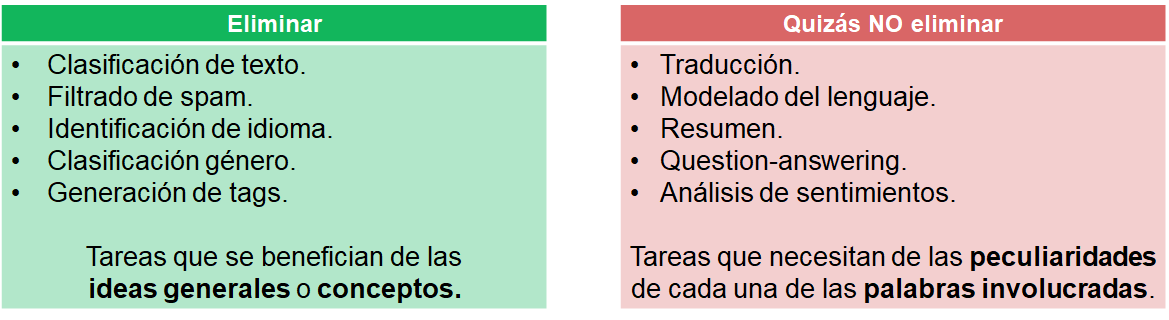

No hay una lista exhaustiva de stopwords, cada biblioteca define alguna, al menos para el inglés. Acá podemos observar las diferencias entre las listas de NLTK y spaCy.

In [ ]:
nltk.download('stopwords') # la primera vez hay que descargarlas

nltk_stopwords = nltk.corpus.stopwords.words('english')
print("NLTK:",len(nltk_stopwords),nltk_stopwords)

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print("spaCy:",len(spacy_stopwords),spacy_stopwords)

nltk_not_spacy = [i for i in nltk_stopwords if i not in spacy_stopwords] 
print("nltk_not_spacy:",len(nltk_not_spacy),nltk_not_spacy)

spacy_not_nltk = [i for i in spacy_stopwords if i not in nltk_stopwords] 
print("spacy_not_nltk:",len(spacy_not_nltk),spacy_not_nltk)

##### NLTK

Una vez obtenida la lista de palabras, hay que recorreras para poder filtrarlas.

In [ ]:
print(words)
new_words = [w for w in words if not w in nltk_stopwords] 
print(new_words)

Si quisieramos definir un método que tome un texto completo...

In [ ]:
def remove_stopwords(text,is_lower_case=False):
    tokens = ToktokTokenizer().tokenize(text)

    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in nltk_stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in nltk_stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

##### spaCy

En este caso, los tokens traen información asociada respecto a si son stopwords o no.

In [ ]:
stop = []
not_stop = []

for token in hp_doc:
    if token.is_stop:
        stop.append(token)
    else:
        not_stop.append(token)

print(stop)
print(not_stop)

### Corrección de texto

Hay dos posibles casos:
1. Las palabras tienen typos.
2. Las palabras tienen caracteres repetidos que no contribuyen al significado general.

El objetivo es standarizar la escritura de las diferentes palabras de forma de no perder información relevante. 

**Ojo!** Puede que haya tareas en las que eliminar los caracteres repetidos no sea una buena idea. Por ejemplo, pueden ser utilizados para expresar emociones, y, por lo tanto, ser útiles para sentiment analysis.

De las cuatro bibliotecas en la cloud que vimos, solo Azure y Amazon Comprehend proveen servicios de spell checker. En el caso de Azure se puede acceder al servicio con el acceso "gratis" por un año que dan al inicio de la subscripción. En el caso de Amazon, es preciso crear una cuenta e ingresar una tarjeta de crédito válida.

#### Caracteres repetidos

* Palabras que a menudo contienen varios caracteres repetidos que podrían deberse a deletreos incorrectos, lenguaje de jerga o incluso a personas que desean expresar emociones fuertes.

* Combinación de sintaxis y semántica para corregir estas palabras.

* **Sintaxis:** identificar los caracteres repetidos en una palabra usando un patrón de expresiones regulares y luego usar una sustitución para eliminar los caracteres uno por uno.
  * ``r '(\ w *) (\ w) \ 2 (\ w *) ’`` identificar caracteres que ocurren dos veces entre otros caracteres en la palabra.
  * Eliminar uno de los caracteres repetidos.
  * Repetir este proceso hasta que no queden caracteres repetidos.

* **Semántica:** la palabra obtenida podría no ser correcta.
Usar algún corpus o diccionario para verificar las palabras válidas en cada etapa y terminar el ciclo una vez que se obtiene.


In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
from nltk.corpus import wordnet

def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3' # hace referencia a los grupos de subpatrones entre () en la expresión. Cada subpatrón se reemplaza por si mismo, excepto el segundo que no está encerrado entre ()
    
    def replace(old_word):
        if len(wordnet.synsets(old_word)) > 0:
             return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
       
        return replace(new_word) if new_word != old_word else new_word

    for word in tokens:
        print(word,replace(word))
    
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

In [ ]:
result = remove_repeated_characters(['greaaat']) # acepta una lista de palabras a corregir
result,wordnet.synsets(result[0])

In [ ]:
result = remove_repeated_characters(['finaaaaaalllyyyy']) # acepta una lista de palabras a corregir
result,wordnet.synsets(result[0])

In [ ]:
result = remove_repeated_characters(['finalllyyyy']) # acepta una lista de palabras a corregir
result,wordnet.synsets(result[0])

#### Corrección de spelling

* Problema con la ortografía incorrecta que se produce debido a un error humano.
* Lo que intentan solucionar los diccionarios predictivos.

* El objetivo final es que los tokens tengan la ortografía correcta.

* Basado en corpus y frecuencia de palabras.
Ej. Corpus de Gutenberg (corpus de 443 millones de palabras), Wiktionary y el Corpus Nacional Británico.


Algoritmo de Norvig Director de investigación de Google. Precisión del 80% ~ 90%.
Generar un conjunto de palabras candidatas que estén cerca de la palabra a corregir y seleccionar la palabra más probable de este conjunto como la palabra correcta.
Edit distance para medir la semejanza (cuántos cambios tengo que hacer en la palabra para obtener la similar?)
Usar un corpus de palabras correctamente escritas para identificar cual es la palabra “estadísticamente correcta” en relación a su frecuencia.

No es provisto por todas las bibliotecas.


##### NLTK

No lo soporta. Se puede implementr utilizando un corpus para el cálculo de estadísticas de frecuencias de palabras.

In [ ]:
import urllib
import collections
import re

def tokens(text):
    return re.findall('[a-z]+', text.lower())

url = "http://norvig.com/big.txt"
filename = "big.txt"
urllib.request.urlretrieve(url, filename)
WORDS = tokens(open('big.txt').read())
WORD_COUNTS = collections.Counter(WORDS)
# top 10 words in corpus
# print(WORD_COUNTS.most_common(10))

def correct(word):
    "Find the best spelling correction for this word."
    # Prefer edit distance 0, then 1, then 2; otherwise default to word itself.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    print(word,":",candidates)
    return max(candidates, key=WORD_COUNTS.get)

def known(words):
    "Return the subset of words that are actually in the dictionary."
    return {w for w in words if w in WORD_COUNTS}

def edits0(word): 
    "Return all strings that are zero edits away from word (i.e., just word itself)."
    return {word}

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "Return all strings that are two edits away from this word."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

def correct_text(text):
    "Correct all the words within a text, returning the corrected text."
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    "Spell-correct word in match, and preserve proper upper/lower/title case."
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    "Return the case-function appropriate for text: upper, lower, title, or just str."
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

text_to_correct = "AI lov natural languash procesing"
corrected_text = correct_text(text_to_correct)
print(text_to_correct,":",corrected_text)

O, también se pueden utilizar paquetes que ya lo traen implementado, como [``pyspellchecker``](https://pypi.org/project/pyspellchecker/), el cual soporta Inglés, Español, Alemán, Francés y Portugués. Permite:
* Corregir una palabra o frase. 
* Encontrar los candidatos a una corrección.
* Determinar cuáles dentro de la frase son palabras conocidas (es decir, que están incluidas en el diccionario)
* Determinar cuál es la probabilidad de las palabras en el diccionario.
* Agregar más palabras al diccionario.

In [ ]:
pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['ai', 'lov', 'natural', 'languash', 'procesing']) # busca corregir solo aquellas palabras que no aparecen en el diccionario

for word in misspelled:
    print(spell.correction(word))

    print(spell.candidates(word))

##### spaCy

No lo soporta de forma directa, pero se puede agregar un paquete. Hunspell es el corrector ortográfico que usa Open Office.

In [ ]:
!pip install python-dev-tools
!apt-get install libhunspell-dev # además de los requerimientos de python, para usar esta extensión necesitamos instalar un paquete extra de Linux
!pip install spacy_hunspell

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
from spacy_hunspell import spaCyHunSpell

# esto de acá abajo se hace una única vez. Si se intenta agregar al pipeline algo que ya existe, da error.
hunspell = spaCyHunSpell(nlp, "linux") # acá "linux" indica cómo/dónde tiene que buscar los archivos de diccionarios que necesita. Otras opciones son "mac" y definir manualmente las direcciones "('en_US.dic', 'en_US.aff')"
nlp.add_pipe(hunspell)

corrected_doc = nlp(text_to_correct)

for t in corrected_doc:
   print(t.text, t._.hunspell_suggest)


##### TextBlob

Soporta solo inglés.

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

corrected_text = TextBlob(text_to_correct).correct()
print(corrected_text)

##### Language-check

Podemos aprovechar ``language-check`` que la descargamos para ``PyContractions``.

In [ ]:
import language_check

tool = language_check.LanguageTool('en-US')
matches = tool.check(text_to_correct)
len(matches)

for match in matches:
    print(match) # podríamos imprimir los diferentes componentes por separado

También podemos aplicar directamente la corrección:

In [ ]:
language_check.correct(text_to_correct, matches)

#### Normalización de inflexiones

En algunos casos puede ser útil la generación de plurales, singulares, números ordinales, convertir los números a palabras...



##### TextBlob

Como vimos la clase anterior, TextBlob permite encontrar plurales y singulares basados en reglas. Puede fallar!

In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

In [ ]:
textp = ("How very wrong he was.")
text_blob_object = TextBlob(textp)
print(text_blob_object.words.pluralize())

Si queremos sacar los plurales...

In [ ]:
textp = ("Hows veries wrongs they wass.")
text_blob_object = TextBlob(textp)
print(text_blob_object.words.singularize())

#### [inflect](https://pypi.org/project/inflect/)

Este paquete permite eliminar plurales, la singularización de palabras y al manipulación de números para su transformación a palabras. Se basa en el diccionario de Oxford y en las guías de uso del Inglés moderno de Fowler. 

Originalmente pensado para spelling británico, pero acepta spelling americano, así como también slang. 

A diferencia de TextBlob incorpora más reglas que la consideración de cómo termina una palabra. Por ejemplo, contempla la formación de plurales de acuerdo al contexto o POS tag. Asimismo, permite la definición de reglas particulares.

In [ ]:
pip install inflect

In [ ]:
import inflect

p = inflect.engine()

In [ ]:
# Pluralizacióm

# UNCONDITIONALLY FORM THE PLURAL

print(p.plural("cat"))
print(p.plural("catcus"))

# Formas plurales de acuerdo a los POS tags

print(
    p.plural_noun("He"),
    p.plural_verb("saw"),
    p.plural_adj("my"),
    p.plural_noun("saw"),
)

print(
    p.plural_noun("He",1), # fuerza a que no lo cambie
    p.plural_verb("saw"),
    p.plural_adj("my"),
    p.plural_noun("saw"),
)

print(
    p.plural_noun("He"),
    p.plural_verb("saw"),
    p.plural_adj("my",1), # fuerza a que no lo cambie
    p.plural_noun("saw"),
)

In [ ]:
# singularización

print(p.singular_noun("cats"))
print(p.singular_noun("cactuses"))

print(p.singular_noun("they"))


In [ ]:
# agregar artículos indefinidos

print(p.an("thing"))
print(p.an("idea"))

In [ ]:
# convertir números a ordinales
print(p.ordinal(1))
print(p.ordinal(2))
print(p.ordinal(18))
print()

In [ ]:
# convertir números a letras
print(p.number_to_words(1234))

# convertir un ordinal
print(p.number_to_words(p.ordinal(1234)))
print()

In [ ]:
# agregando grupos
print(p.number_to_words(12345, group=1))

print(p.number_to_words(12345, group=2))

print(p.number_to_words(12345, group=3))
print()

In [ ]:
# modificando las conjunciones, por defecto es "and"
print(p.number_to_words(1234, andword=""))

print(p.number_to_words(1234, andword=", plus"))

In [ ]:
# grupos y definición de palabras específicas
print(p.number_to_words(555_1202, group=1, zero="oh"))

print(p.number_to_words(555_1202, group=1, one="unity"))

print(p.number_to_words(123.456, group=1, decimal="comma"))

In [ ]:
# se puede poner un threshold a partir del cual pasar a letra

print(p.number_to_words(9, threshold=10)) 
print(p.number_to_words(10, threshold=10)) 
print(p.number_to_words(11, threshold=10)) 
print(p.number_to_words(1000, threshold=10)) 

In [ ]:
# Provee alternativas clásicas y modernas de los plurales. Por defecto usa las modernas, pero se pueden forzar las clásicas.

p.classical()  # todas las modernas

p.classical(herd=True)  
print(p.plural("buffalo"))

p.classical(herd=False)  
print(p.plural("buffalo"))

In [ ]:
p.classical(persons=True)
print(p.plural("person")) 
p.classical(persons=False)  # "2 chairpeople" INSTEAD OF "2 chairpersons"
print(p.plural("person"))

In [ ]:
p.classical(ancient=True)
print(p.plural("formula")) 
print(p.plural("index"))

p.classical(ancient=False) 
print(p.plural("formula")) 
print(p.plural("index")) 

## Análisis Léxico

Trata el estudio del lenguaje a nivel de las palabras y su significado léxico. 
Se basa en una colección de **"lexemas"**, los cuales son las unidades básicas con un significado léxico. A su vez, el "significado léxico" representa una unidad abstracta basado en la morfología que representa el conjunto de formas que un morfema puede tomar.

En otras palabras, el análisis léxico se ocupa de las palabras y sus formas base, además de las funciones que dichas palabras ocupan en una oración.

Vamos a ver:

* Stemming
* Lemmatization

Con la excepción de los paquetes especiales que vimos, todas las bibliotecas incluyen al menos una de las dos opciones. 


### Stemming

Stemming ayuda a stardarizar las palabras a su forma base, indendientemente de sus inflexiones. Por ejemplo, sacarle la declinación a los verbos conjugados, o incluso los plurales a los sustantivos.

* Los morfemas consisten en unidades que son raíces y afijos.
* Los afijos son unidades como prefijos, sufijos, etc., que se agregan a los formas base de las palabras para cambiar su significado o crear una palabra completamente nueva.
* El stemming ayuda a estandarizar las palabras en su raíz base, independientemente de sus inflexiones.
* Útil para la clasificación, agrupamiento o incluso recuperación de información.


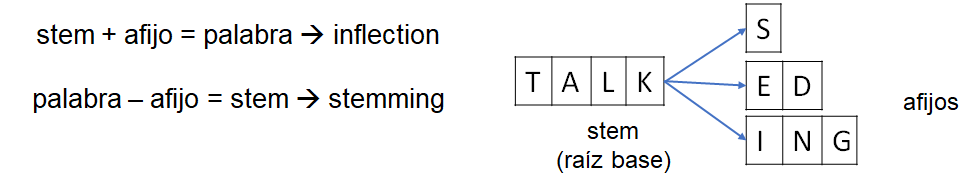

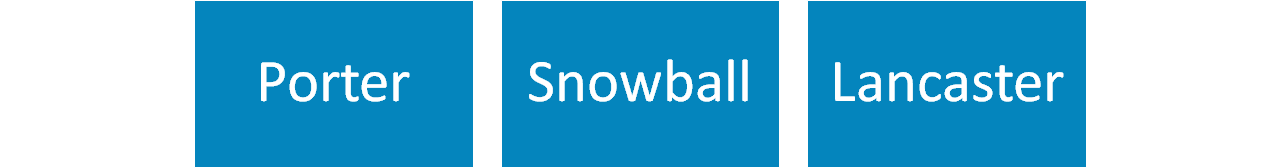


Diversas alternativas

* Porter. 
  * Uno de los primeros algoritmos.
  * Soporta idioma inglés.
  * Busca eliminar las terminaciones comunes de las palabras para que puedan resolverse a una forma común.
  * Garantiza la reproducibilidad.
  * Poco agresivo.
  * Es un buen algoritmo básico, pero no se recomienda usarlo para ninguna aplicación “real”.

* Snowball. 
  * Mejora sobre Porter.
  * Es un poco más rápido que Porter.
  * Más agresivo que Porter. 
  * Danish, Dutch, English, Finnish, French, German, Hungarian, Italian, Norwegian, Portuguese, Romanian, Russian, Spanish, Swedish.

* Lancaster. 
  * Algoritmo muy agresivo y rápido.
  * A diferencia de Porter y Snowball, las representaciones derivadas no son intuitivas.
  * Los stems pueden ser "confusos".
  * No es recomendable si se quieren stems reconocibles o interpretables.
  * En NLTK, se le pueden agregar más reglas.



##### NLTK

In [ ]:
import nltk
from nltk.stem import PorterStemmer

words = text_list[3].split(" ")

print("Original:",words)

ps = PorterStemmer()
stemmed = ' '.join([ps.stem(word) for word in words])
print("PorterStemmer:",stemmed)

from nltk.stem import LancasterStemmer

ls = LancasterStemmer()
stemmed = ' '.join([ls.stem(word) for word in words])
print("LancasterStemmer:",stemmed)

from nltk.stem import SnowballStemmer

ss = SnowballStemmer(u'english')
stemmed = ' '.join([ss.stem(word) for word in words])
print("SnowballStemmer:",stemmed)

##### spaCy

No soporta stemming dado que consideran que lemmatization es un mejor enfoque para la obtención de las formas raíz de las palabras.

### Lemmatization

De forma similar al stemming, remueve los affixes de las palabras para encontrar su forma base. A diferencia de las formas básicas obtenidas con el stemming, los lemmas siempre son palabras válidas (se encuentran en el diccionario).

Es un proceso más lento que el de stemming dado que que hay que chequear que el lemma encontrado sea una palabra válida.

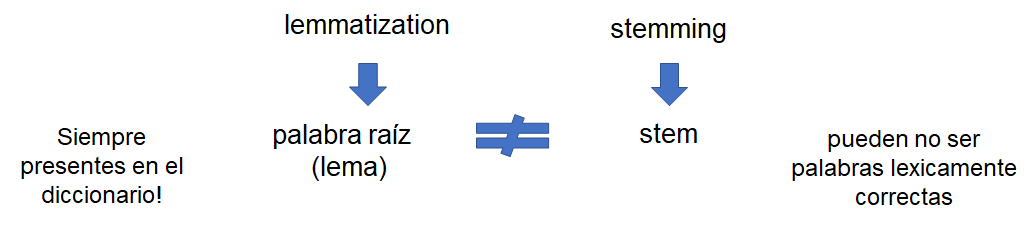


##### NLTK

Utiliza WordNet. Para encontrar el lemma correcto requiere proporcionar el part-of-speech.

In [ ]:
import nltk
nltk.download('wordnet') 

In [ ]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

print (wnl.lemmatize('ate', 'n'))
print (wnl.lemmatize('ate', 'v'))

print (wnl.lemmatize('fancier', 'v')) # la importancia de definir adecuadamente el POS tag
print (wnl.lemmatize('fancier', 'a'))

##### spaCy

La lemmatization se encuentra incluida en el pipeline de parsing básico. A diferencia de ```NLTK```, al estar incluido en el pipeline general, no es necesario proporcionar información extra.

In [ ]:
for word in hp_doc:
    print(word.text,"-->",word.lemma_)

In [ ]:
def lemmatize_text(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    lemmatized = ''
    for word in doc:
        if not word.lemma_.startswith('-') :
            lemmatized += word.lemma_ + ' '
    
    return lemmatized

##### stanza

In [ ]:
pip install stanza

In [ ]:
import stanza
stanza.download('en')

In [ ]:
nlp = stanza.Pipeline('en') # se setea el pipeline por defecto para el idioma inglés. Por defecto: tokenize, pos tagger, lemmatization, ner y parsing sintáctico

stanford_hp_doc = nlp(text) # doc contiene todas las anotaciones

for _,sentence in enumerate(stanford_hp_doc.sentences): 
    for word in sentence.words: 
        print(word.text,"-->",word.lemma) 

### Alguien dijo "pipeline"?

Hasta ahora tenemos todo el pre-procesamiento separado en diversos métodos independientes. Sin embargo, su uso puede resultar tedioso, sobretodo cuando debemos replicar el pre-procesamiento en diferentes etapas (por ejemplo, para aplicarlo a los conjuntos de training y test previo al entrenamiento y clasificación). 

La solución "fácil" sería crear un método que podamos invocar y permita hacer todo el procesamiento junto para luego usar el texto procesado como entrada a otro elemento. 
En este caso, podríamos tener algo como (no refleja exactamente todo lo que hicimos anteriormente, por ejemplo, no incluye spell checker):

In [ ]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,accented_char_removal=True, text_lower_case=True,
text_lemmatization=True, special_char_removal=True,stopword_removal=True, remove_digits=True):
    normalized_corpus = []
    # normalize each document in the corpus
    #sentence
    for doc in nltk.sent_tokenize(corpus):
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = str(remove_accented_chars(doc))
        # expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc,CONTRACTION_MAP)
        # lowercase the text
        if text_lower_case:
            doc = doc.lower()
        # remove special characters and\or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
          # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [ ]:
print(text)
normalize_corpus(text)

Sin embargo, ahora nos encontramos en el "problema" en que tenemos que recordar invocar este método cada vez que querramos procesar el texto para usarlo en algún modelo.

Luego, vamos a ver como integrar esto en las estructuras propias de ``sklearn`` para utilizarlo dentro del pipeline de clasificación.

### Bonus: modificando el pipeline de ```spaCy```.

Como ya mencionó, ```spaCy``` define un pipeline por defecto que incluye:

* ```tokenizer```
* ```tagger```
* ```parser``` (Análisis Sintáctico)
* ```ner``` (Análisis Semántico)

Ahora, a ese pipeline, le podríamos agregar un elemento propio que nos imprima información de lo procesado.

**Nota**. Acá hay otra variación respecto a versiones más viejas de la biblioteca. Mientras que antes se permitía agregar el componenete pasando directamente el ``callable`` ahora hay que pasar el nombre del componente previamente registrado en el factory.

**Nota**. Esta versión "vieja" de spacy es la que todavía se instala por default en Colab.

In [ ]:
import spacy

In [ ]:
# componente original que podía ser utilizado de forma directa en versiones anteriores 
def my_component(doc):
    print("After tokenization, this doc has {} tokens.".format(len(doc)))
    print("The part-of-speech tags are:", [token.pos_ for token in doc])
    if len(doc) < 10:
        print("This is a pretty short document.")
    return doc

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# version más vieja de la biblioteca, pasaba el callable
nlp.add_pipe(my_component, name="print_info", last=True)

**Nota**. Lo que sigue aplica para versiones de spacy > 3.0

Para el registro en el factory (la clase ``Language``), hay dos opciones:

1. Se lo usa como un decorator. Decorator con o sin parámetros. Para configuraciones statefull o stateless.

2. Se lo usa como una función.

In [ ]:
from spacy.language import Language

In [ ]:
# decorator del componente tal como lo teníamos definido antes

@Language.component("print_info")
def my_component(doc):
    print("After tokenization, this doc has {} tokens.".format(len(doc)))
    print("The part-of-speech tags are:", [token.pos_ for token in doc])
    if len(doc) < 10:
        print("This is a pretty short document.")
    return doc

# lo agregamos al pipeline
nlp.add_pipe("print_info", last=True)
print(nlp.pipe_names) 

In [ ]:
# Usage as a function
Language.component("print_info2", func=my_component)

nlp.add_pipe("print_info2", last=True)
print(nlp.pipe_names) 

In [ ]:
short_text = "My car is broken"
nlp(short_text)

Los componentes también pueden ser metidos dentro de clases lo que permite que se agreguen componentes que mantengan su propio estado.

Por otra parte, también podríamos deshabilitar elementos del pipeline:

In [ ]:
nlp = spacy.load("en_core_web_sm")

for word in nlp(text_list[3]):
    print(word.text,word.tag_)

print()
nlp = spacy.load("en_core_web_sm",disable=["tagger"]) # al momento de carga
for word in nlp(text_list[3]):
    print(word.text,word.tag_)

print()
nlp = spacy.load("en_core_web_sm")
for word in nlp(text_list[3],disable=["tagger"]): # al momento de usarlo
    print(word.text,word.tag_)